# Natural Language Processing (NLP) with TensorFlow: Sentiment Analysis on IMDB Reviews



## Natural Language Processing (NLP)
Natural Language Processing (NLP) is a branch of artificial intelligence (AI) that focuses on enabling computers to understand, interpret, and generate human language. NLP encompasses a wide range of tasks, from text analysis and sentiment classification to machine translation and text generation. It aims to bridge the gap between human language and machine understanding, enabling computers to process and derive meaning from textual data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Sayed-Husain/AI-and-Deep-Learning-Bootcamp/main/Data/IMDB%20Dataset.csv")

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


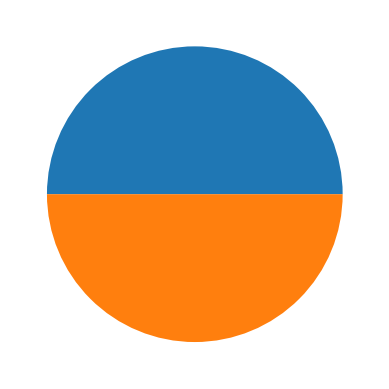

In [22]:
plt.pie(df.sentiment.value_counts());

## Understanding NLP, TextVectorization, and Embedding


### TextVectorization
TextVectorization is a preprocessing technique in NLP that converts raw text data into numerical vectors that can be used as input for machine learning models. It involves several steps:

1. **Tokenization**: Text is split into individual words or subwords, known as tokens. or example, the sentence "I love NLP" might be tokenized into ["I", "love", "NLP"].

2. **Vocabulary Building:** A vocabulary is created by mapping each unique token to a unique integer index. The vocabulary captures the set of all tokens present in the dataset.

3. **Vectorization:** Each text sample is represented as a sequence of integer indices corresponding to the tokens in the vocabulary. These sequences can be of fixed or variable lengths.

TextVectorization helps transform raw text data into a format that machine learning models can understand and process. It prepares the data for tasks like sentiment analysis, text classification, and more.

In [4]:
# Step 1: Create the TextVectorization and specify the size of the vocabulary

from tensorflow.keras.layers import TextVectorization

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(20000) # Number of the vocabulary

In [5]:
# Step 2: Adapt (Create the vocabulary list)
text_vectorizer.adapt(df.review)

In [6]:
# Create sample sentence and tokenize it
sample_sentence = "Hi, I am an AI developer"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 6), dtype=int64, numpy=array([[ 7869,    10,   227,    34, 14739,     1]])>

In [7]:
# To confirm, lets take a random review and tokenize it
import random

random_sentence = random.choice(df.review)
print("Original Sentence: " + random_sentence)
print("Tokenized Version: ")
text_vectorizer([random_sentence])

Original Sentence: I remember this movie in particular when I was a teenager, my best friend was telling me all about this movie and how it freaked her out as a kid. Of course being the blood thirsty gal that I am, I had to go out and find this movie. Now I don't know how to put this without loosing credibility, so I'm just going to say it, I actually had fun watching this movie! I know that it's stupid, not the best story and beyond bloody and gruesome, but that's what I was looking for and The Dentist delivers in the scares, blood, sex, and crazy psychopaths. Sometimes I just need a fun movie like this to just let loose and get grossed out by.<br /><br />Dr. Alan Feinstone is obsessed with order and cleanliness. On the day of his wedding anniversary, he spies his wife Brooke having sex with their filthy pool man, Matt. At his dental practice, Feinstone's first patient of the day is young Jody Saunders, there for his very first dental appointment. Feinstone begins to clean Jody's teet

<tf.Tensor: shape=(1, 534), dtype=int64, numpy=
array([[   10,   373,    11,    18,     8,   837,    51,    10,    14,
            4,  2146,    54,   117,   446,    14,  1024,    70,    32,
           43,    11,    18,     3,    86,     9,  9773,    42,    46,
           15,     4,   542,     5,   260,   107,     2,   553, 16054,
         6019,    12,    10,   227,    10,    68,     6,   139,    46,
            3,   160,    11,    18,   149,    10,    90,   118,    86,
            6,   264,    11,   200, 12697,  2968,    38,   142,    41,
          162,     6,   129,     9,    10,   155,    68,   247,   146,
           11,    18,    10,   118,    12,    30,   362,    22,     2,
          117,    67,     3,   650,  1667,     3,  2797,    19,   175,
           49,    10,    14,   269,    17,     3,     2,  4571,  1483,
            8,     2,  2800,   553,   382,     3,   944, 16480,   519,
           10,    41,   344,     4,   247,    18,    39,    11,     6,
           41,   368,  1766, 

### Embedding
Embedding is a fundamental concept in NLP that involves mapping words or tokens from a vocabulary to dense vectors in a continuous space. These dense vectors, known as word embeddings, capture semantic relationships between words. Word embeddings are learned from data and carry information about word meanings and relationships.

In NLP models, an embedding layer is often used to map integer-encoded tokens to their corresponding word embeddings. This layer learns to associate words with vectors in such a way that similar words are closer in the embedding space. Embeddings enhance model performance by allowing it to generalize word meanings and understand relationships between words.

In [8]:
# Create an embedding layer
embedding = tf.keras.layers.Embedding(input_dim = 20000, # set input shape (the vocabulary size)
                                     output_dim = 32) # Relationship between words (the higher the number, the more complex the relationship gets)


In [9]:
# Create sample sentence and tokenize it, then embed it
sample_sentence = "Hi, I am an AI developer"
embedding(text_vectorizer([sample_sentence]))

<tf.Tensor: shape=(1, 6, 32), dtype=float32, numpy=
array([[[-0.00464096,  0.03033643,  0.02118028,  0.0188549 ,
          0.03204961, -0.00197672, -0.02679323, -0.02697771,
         -0.03178073, -0.00915281,  0.01259855,  0.0458838 ,
         -0.00688763,  0.03000876, -0.03463098,  0.04320988,
         -0.01721519, -0.02018221, -0.03416524,  0.02594179,
         -0.03320684, -0.02012844, -0.04967786,  0.02299986,
         -0.00789645,  0.03606239,  0.04569738, -0.00754238,
          0.00484539,  0.00658226,  0.02977129,  0.02737487],
        [ 0.04098124, -0.01022293,  0.0002941 ,  0.00848959,
          0.00688078, -0.02389263,  0.03927061,  0.02128396,
         -0.02001007,  0.01012361,  0.00063753,  0.01322407,
          0.00602251,  0.02812502,  0.0015435 , -0.01301654,
         -0.03966885, -0.00399882,  0.00939203, -0.03183   ,
          0.01390005,  0.01437268,  0.03362716, -0.02421597,
         -0.04542769,  0.00772567,  0.01699675,  0.01364693,
         -0.01400103,  0.0233208

## Prepare the dateaset

In [10]:
X = df.review
y = df.sentiment

In [11]:
y[y == "positive"] = 1
y[y == "negative"] = 0
y = np.asarray(y, np.float32).reshape((-1,1))

In [12]:
X_train = X[:1000]
X_test = X[1000:]

y_train = y[:1000]
y_test = y[1000:]

## Bulid the model

### 1. Dense model

In [13]:
# 1. Bulid the Model
model = tf.keras.Sequential([
    tf.keras.layers.Input(dtype=tf.string, shape=(1,)),
    text_vectorizer,
    embedding,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 dense (Dense)               (None, None, 128)         4224      
                                                                 
 dense_1 (Dense)             (None, None, 1)           129       
                                                                 
Total params: 324,353
Trainable params: 324,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 2. Compile the model
model.compile(optimizer="Adam",
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

In [15]:
# 3. Fit / Train
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
32/32 [==============================] - 18s 495ms/step - loss: 0.6937 - accuracy: 0.5001 - val_loss: 0.6929 - val_accuracy: 0.5083
Epoch 2/5
32/32 [==============================] - 16s 515ms/step - loss: 0.6928 - accuracy: 0.5123 - val_loss: 0.6925 - val_accuracy: 0.5105
Epoch 3/5
32/32 [==============================] - 14s 445ms/step - loss: 0.6924 - accuracy: 0.5053 - val_loss: 0.6919 - val_accuracy: 0.5118
Epoch 4/5
32/32 [==============================] - 17s 532ms/step - loss: 0.6901 - accuracy: 0.5275 - val_loss: 0.6913 - val_accuracy: 0.5132
Epoch 5/5
32/32 [==============================] - 14s 445ms/step - loss: 0.6882 - accuracy: 0.5245 - val_loss: 0.6913 - val_accuracy: 0.5133


### 2. RNN Model

In [16]:
# 1. Bulid the Model
model_rnn = tf.keras.Sequential([
    tf.keras.layers.Input(dtype=tf.string, shape=(1,)),
    text_vectorizer,
    embedding,
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),  # Simple RNN layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Fit
model_rnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
32/32 [==============================] - 54s 2s/step - loss: 0.6585 - accuracy: 0.6160 - val_loss: 0.6516 - val_accuracy: 0.6849
Epoch 2/5
32/32 [==============================] - 49s 2s/step - loss: 0.5614 - accuracy: 0.8580 - val_loss: 0.5768 - val_accuracy: 0.7512
Epoch 3/5
32/32 [==============================] - 48s 2s/step - loss: 0.4253 - accuracy: 0.8410 - val_loss: 0.5888 - val_accuracy: 0.7335
Epoch 4/5
32/32 [==============================] - 48s 2s/step - loss: 0.3400 - accuracy: 0.8880 - val_loss: 0.5280 - val_accuracy: 0.7555
Epoch 5/5
32/32 [==============================] - 48s 2s/step - loss: 0.2392 - accuracy: 0.9440 - val_loss: 0.6334 - val_accuracy: 0.7363


### 3. Transfer Learning Model

We will use **`Google`**'s own **`universal-sentence-encoder`** model found [**Here**](https://tfhub.dev/google/universal-sentence-encoder/4)



In [17]:
import tensorflow_hub as hub

# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string) # data type of inputs coming to the USE layer

In [18]:
# Create model using the Sequential API
model = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model
model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
32/32 [==============================] - 63s 2s/step - loss: 0.6593 - accuracy: 0.6930 - val_loss: 0.6169 - val_accuracy: 0.7797
Epoch 2/5
32/32 [==============================] - 83s 3s/step - loss: 0.5596 - accuracy: 0.8200 - val_loss: 0.5245 - val_accuracy: 0.8047
Epoch 3/5
32/32 [==============================] - 57s 2s/step - loss: 0.4593 - accuracy: 0.8520 - val_loss: 0.4533 - val_accuracy: 0.8204
Epoch 4/5
32/32 [==============================] - 83s 3s/step - loss: 0.3898 - accuracy: 0.8650 - val_loss: 0.4134 - val_accuracy: 0.8265
Epoch 5/5
32/32 [==============================] - 58s 2s/step - loss: 0.3450 - accuracy: 0.8690 - val_loss: 0.3885 - val_accuracy: 0.8308


In [19]:
model.predict(["This is the best movie I ever saw in my entire life. just Wow."])

1/1 [==============================] - 0s 407ms/step


array([[0.8861213]], dtype=float32)

In [20]:
model.predict(["I barely watched the movie, terrible plot, terrible acting, bad experience in general. Do not waste your money."])

1/1 [==============================] - 0s 44ms/step


array([[0.02214688]], dtype=float32)

In [21]:
model.predict(["I mean it alright, overrated if you want my opinion."])

1/1 [==============================] - 0s 54ms/step


array([[0.38793907]], dtype=float32)